In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Information

We are provided with two data files for this assignment: Supply and Demand. These datasets encompass the supply-demand factors that have impacted US home prices over the last two decades.


Supply File:
- DATE: The observation date ranging from 2003 to 2023.
- PERMIT: Total units (in thousands) of new privately-owned housing units authorized for construction in permit-issuing places, represented as a seasonally adjusted annual rate.
- MSACSR: Monthly supply of new houses in the United States, adjusted for seasonal variations.
- TLRESCONS: Total construction spending on residential projects in the United States, measured in millions of dollars and adjusted for seasonal variations.
- EVACANTUSQ176N: Estimate of vacant housing units in the United States, represented as thousands of units and not adjusted for seasonal variations.
- CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index, representing home prices in the United States. The index is seasonally adjusted, with a base index of 100 in January 2000.This variable serves as a proxy for home prices.

Demand File:
- INTDSRUSM193N: Interest Rates, specifically the discount rate for the United States, measured in billions of dollars and adjusted for seasonal variations.
- UMCSENT: Consumer Sentiment, measured through surveys conducted by the University of Michigan, providing a consumer sentiment index.
- GDP: Gross Domestic Product, measured in billions of dollars and adjusted for seasonal variations.
- MORTGAGE15US: 30-Year Fixed Rate Mortgage Average in the United States, represented as a percentage and not adjusted for seasonal variations.
- MSPUS: Median Sales Price of Houses Sold in the United States, not adjusted for seasonal variations.
- CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index, representing home prices in the United States. The index is seasonally adjusted, with a base index of 100 in January 2000.This variable serves as a proxy for home prices.

The frequency of the data in both the Supply and Demand files is quarterly. This means that observations are available at the end of each quarter.



In [227]:
supply_data = pd.read_csv("supply.csv")
demand_data = pd.read_csv("demand.csv")

In [228]:
supply_data.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321000,4.200000,1806.333333,421328.6667,14908.0
1,01-04-2003,131.756000,3.833333,1837.666667,429308.6667,15244.0
2,01-07-2003,135.013000,3.633333,1937.333333,458890.0000,15614.0
3,01-10-2003,138.835667,3.966667,1972.333333,491437.3333,15654.0
4,01-01-2004,143.298667,3.700000,1994.666667,506856.3333,15895.0


In [229]:
demand_data.head()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447


# Merging Data

In [230]:
df = pd.merge(supply_data, demand_data, on='DATE', suffixes=('_supply', '_demand'))

In [231]:
df.head()

,DATE,CSUSHPISA_supply,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_demand,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,4.200000,1806.333333,421328.6667,14908.0,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,3.833333,1837.666667,429308.6667,15244.0,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,3.633333,1937.333333,458890.0000,15614.0,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,3.966667,1972.333333,491437.3333,15654.0,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,3.700000,1994.666667,506856.3333,15895.0,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [232]:
d = df.copy()

# Data Preprocessing & Exploratory Data Analysis

Renaming Columns

In [233]:
df.rename(columns = {'CSUSHPISA_supply':'Home_price_index', 'MSACSR':'Monthly_supply_houses','PERMIT':'Permit','TLRESCONS':'Total_construction_spending','EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'Mortgage_30y','UMCSENT':'Consumer_sentiment_index','INTDSRUSM193N':'Interest_rate','MSPUS':'Median_sales_price'}, inplace = True)


In [234]:
df.head()

,DATE,Home_price_index,Monthly_supply_houses,Permit,Total_construction_spending,Housing_inventory,CSUSHPISA_demand,Mortgage_30y,Consumer_sentiment_index,Interest_rate,Median_sales_price,GDP
0,01-01-2003,129.321000,4.200000,1806.333333,421328.6667,14908.0,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,3.833333,1837.666667,429308.6667,15244.0,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,3.633333,1937.333333,458890.0000,15614.0,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,3.966667,1972.333333,491437.3333,15654.0,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,3.700000,1994.666667,506856.3333,15895.0,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [235]:
df.drop(columns = 'CSUSHPISA_demand', inplace = True)

In [236]:
df.shape

(81, 11)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         81 non-null     object 
 1   Home_price_index             80 non-null     float64
 2   Monthly_supply_houses        81 non-null     float64
 3   Permit                       81 non-null     float64
 4   Total_construction_spending  81 non-null     float64
 5   Housing_inventory            81 non-null     float64
 6   Mortgage_30y                 81 non-null     float64
 7   Consumer_sentiment_index     81 non-null     float64
 8   Interest_rate                74 non-null     float64
 9   Median_sales_price           81 non-null     int64  
 10  GDP                          81 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.6+ KB


In [238]:
def null_missing(data):
    null_values = data.isnull().sum()
    null_values = null_values[null_values>0].sort_values(ascending = False)
    return null_values

null_missing(df)

Interest_rate       7
Home_price_index    1
dtype: int64

In [239]:
# dropping null values

df.dropna(inplace = True)

In [240]:
# Correcting columns datatype

from datetime import datetime

df['DATE'] = pd.to_datetime(df['DATE'])

df['Home_price_index'] = pd.to_numeric(df['Home_price_index'], errors='coerce')

df['Monthly_supply_houses']= pd.to_numeric(df['Monthly_supply_houses'], errors='coerce')

df['Permit']= pd.to_numeric(df['Permit'], errors='coerce')

df['Total_construction_spending']= pd.to_numeric(df['Total_construction_spending'], errors='coerce')

df['Housing_inventory'] = pd.to_numeric(df['Housing_inventory'], errors='coerce')

In [241]:
# Rounding the values to one decimal place

df['Home_price_index'] = df['Home_price_index'].round(2)
df['Monthly_supply_houses'] = df['Monthly_supply_houses'].round(2)
df['Permit'] = df['Permit'].round(2)
df['Total_construction_spending'] = df['Total_construction_spending'].round(2)
df['Housing_inventory'] = df['Housing_inventory'].round(2)
df['Interest_rate'] = df['Interest_rate'].round(2)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         74 non-null     datetime64[ns]
 1   Home_price_index             74 non-null     float64       
 2   Monthly_supply_houses        74 non-null     float64       
 3   Permit                       74 non-null     float64       
 4   Total_construction_spending  74 non-null     float64       
 5   Housing_inventory            74 non-null     float64       
 6   Mortgage_30y                 74 non-null     float64       
 7   Consumer_sentiment_index     74 non-null     float64       
 8   Interest_rate                74 non-null     float64       
 9   Median_sales_price           74 non-null     int64         
 10  GDP                          74 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memo

In [243]:
df.head()

,DATE,Home_price_index,Monthly_supply_houses,Permit,Total_construction_spending,Housing_inventory,Mortgage_30y,Consumer_sentiment_index,Interest_rate,Median_sales_price,GDP
0,2003-01-01,129.32,4.20,1806.33,421328.67,14908.0,5.840769,79.966667,2.25,186000,11174.129
1,2003-01-04,131.76,3.83,1837.67,429308.67,15244.0,5.506923,89.266667,2.17,191800,11312.766
2,2003-01-07,135.01,3.63,1937.33,458890.00,15614.0,6.033846,89.300000,2.00,191900,11566.669
3,2003-01-10,138.84,3.97,1972.33,491437.33,15654.0,5.919286,91.966667,2.00,198800,11772.234
4,2004-01-01,143.30,3.70,1994.67,506856.33,15895.0,5.597500,98.000000,2.00,212700,11923.447


In [244]:
df['Mortgage_30y'] = df['Mortgage_30y'].round(2)
df['Consumer_sentiment_index'] = df['Consumer_sentiment_index'].round(2)
df['GDP'] = df['GDP'].round(2)

Correlation between Home_price_index and each features

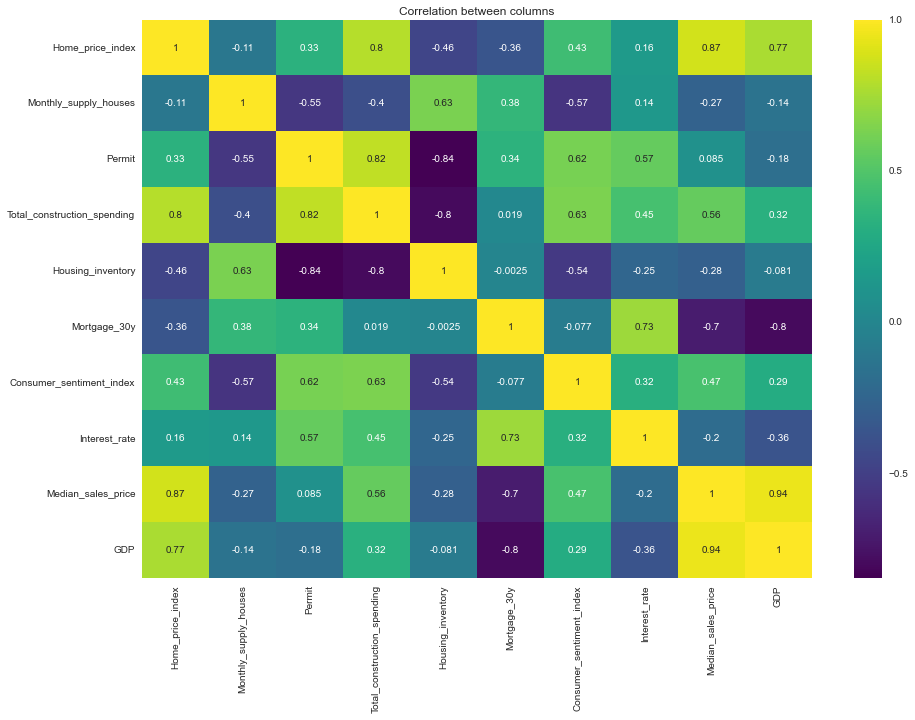

In [245]:
correlation = df.drop('DATE',axis = 1)
corr = correlation.corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(data = corr,annot = True, cmap = 'viridis')
plt.title('Correlation between columns');

fig = ax.get_figure()
fig.savefig('D:\Assignment 3 MECE\Pictures\Heatmap.png')

To analyze the relationship between each column in the data and the 'Home_price_index,' we will examine the correlation coefficients. Correlation coefficients provide insights into the strength and direction of the linear relationship between variables.

Monthly_supply_houses: Negative correlation (-0.11), There is a negative relationship between Monthly supply houses and Home price index. This suggest as the supply of new houses increases, home prices will decrease.

Permit: Positive correlation (0.33), The correlation analysis reveals a moderate positive relationship between the number of authorized housing units and the Home price index. This suggests that an increase in the number of authorized housing units may correspond to higher home prices, indicating a potential positive influence of housing unit authorization on the housing market.

Total_construction_spending: Strong positive correlation (0.80),The correlation analysis highlights a strong positive relationship between total construction spending on residential projects and the Home price index. This finding suggests that increased construction spending is significantly linked to higher home prices, indicating a robust association between the two variables.

Housing_inventory: Negative correlation (-0.46), The correlation analysis reveals a moderate negative relationship between the estimated number of vacant housing units and the Home price index. This indicates that an increase in the number of vacant housing units may have a downward influence on home prices, suggesting a potential negative impact of higher vacancy rates on the housing market.

Mortgage_30y: Negative correlation (-0.36), The correlation analysis indicates a weak negative relationship between mortgage interest rates and the Home price index. This suggests that higher mortgage rates are modestly associated with lower home prices, implying a potential influence of interest rates on the housing market.

Consumer_sentiment_index: Positve correlation (0.43), There is a positive relationship between Consumer sentiments and Home price index. This suggest higher the Consumer sentiment index higher the home prices.

Interest_rate : Slightly Positive correlation (0.16), There is a very small Positive correlation between Interest rate and Home price index, which can go either way.

Median_sales_price: Strong Positive correlation (0.87), An analysis of the data reveals a robust positive relationship between the median sales price of houses sold and the Home price index. The findings indicate that higher median sales prices are strongly correlated with higher home prices, suggesting a strong association between these variables.

GDP: Strong positive correlation (0.77), Examining the data reveals a strong positive relationship between GDP and the Home price index. The findings suggest a significant association, indicating that higher levels of GDP are strongly correlated with higher home prices. These results highlight the influential role of GDP on the housing market.

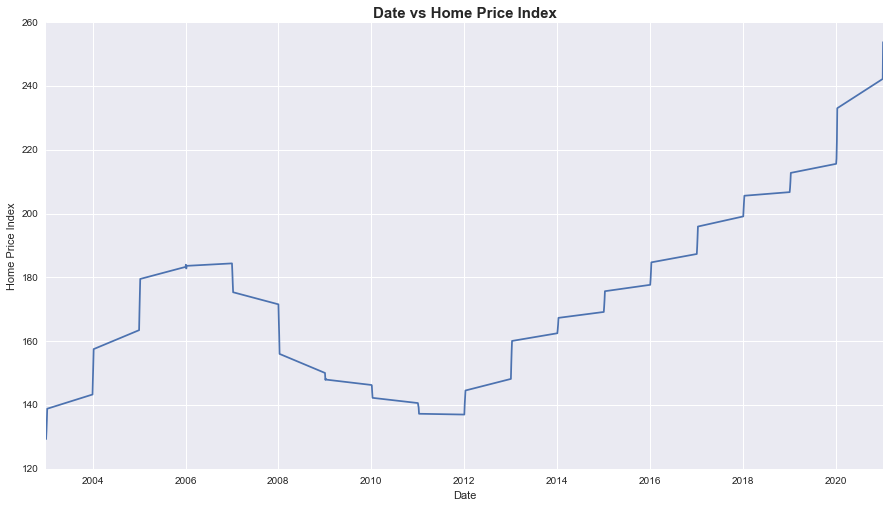

In [246]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn')
ax = sns.lineplot(data = df, x= df['DATE'],y = df['Home_price_index'])
plt.title('Date vs Home Price Index',fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Date')          
plt.ylabel('Home Price Index')
plt.show()
fig = ax.get_figure()
fig.savefig('D:\Assignment 3 MECE\Pictures\DateandHomePriceIndex.png')


The Home Price Index has exhibited a substantial and evident upward trend overall. However, starting from 2008, there was a notable decline in the Home Price Index, which can be attributed to the impact of the 2008 recession that had a severe impact on the housing market. Nevertheless, after 2012, the Home Price Index displayed consistent growth, indicating a recovery and resurgence in the market.

In [248]:
d = df.copy()

In [250]:
d.set_index('DATE', inplace=True)
d['Quarter'] = d.index.to_period('Q')
d['Quarter'] = d['Quarter'].astype(str)

In [251]:
d.head()

,Home_price_index,Monthly_supply_houses,Permit,Total_construction_spending,Housing_inventory,Mortgage_30y,Consumer_sentiment_index,Interest_rate,Median_sales_price,GDP,Quarter
DATE,,,,,,,,,,,
2003-01-01,129.32,4.20,1806.33,421328.67,14908.0,5.84,79.97,2.25,186000,11174.13,2003Q1
2003-01-04,131.76,3.83,1837.67,429308.67,15244.0,5.51,89.27,2.17,191800,11312.77,2003Q1
2003-01-07,135.01,3.63,1937.33,458890.00,15614.0,6.03,89.30,2.00,191900,11566.67,2003Q1
2003-01-10,138.84,3.97,1972.33,491437.33,15654.0,5.92,91.97,2.00,198800,11772.23,2003Q1
2004-01-01,143.30,3.70,1994.67,506856.33,15895.0,5.60,98.00,2.00,212700,11923.45,2004Q1


In [252]:
d_groupby = d.groupby('Quarter').agg({'Monthly_supply_houses': 'sum', 'Home_price_index': 'mean'}).reset_index()


In [253]:
d_groupby

,Quarter,Monthly_supply_houses,Home_price_index
0,2003Q1,15.63,133.7325
1,2004Q1,16.00,150.4425
2,2005Q1,17.81,171.7375
3,2006Q1,25.74,183.4475
4,2007Q1,33.54,179.9175
5,2008Q1,42.70,164.0575
6,2009Q1,36.13,148.5450
7,2010Q1,31.99,144.6700
8,2011Q1,26.33,139.2575
9,2012Q1,19.04,140.9925


In order to gain insights into the relationship between Monthly Supply of Houses and Home Price Index over time, the data has been scaled. By scaling the data, we can effectively compare and analyze the patterns and trends in both variables. This allows us to identify any potential correlations or associations between the Monthly Supply of Houses and Home Price Index, providing valuable insights into their relationship.

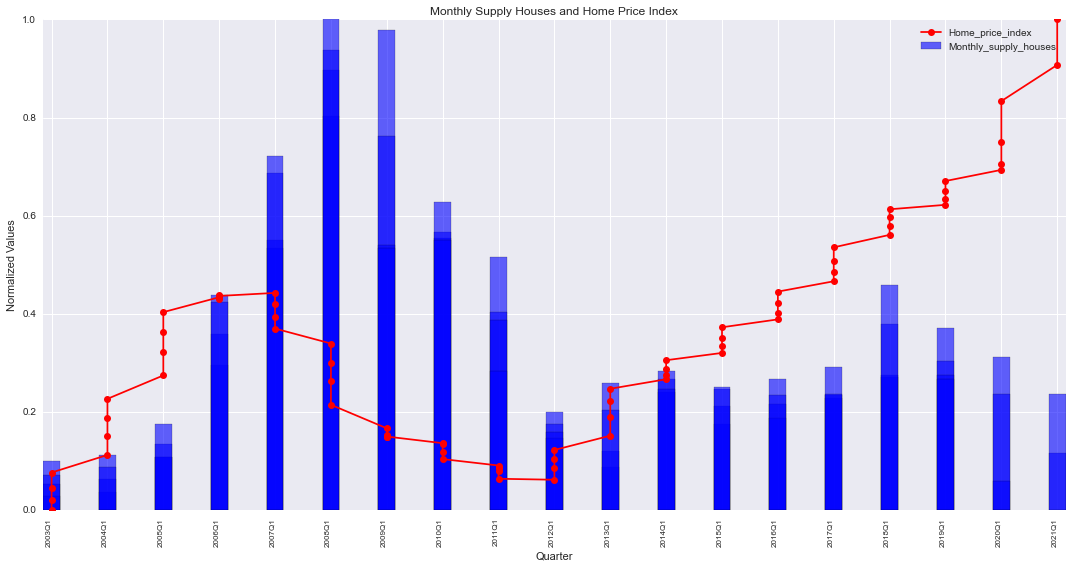

In [274]:

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
d[['Monthly_supply_houses', 'Home_price_index']] = scaler.fit_transform(d[['Monthly_supply_houses', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Monthly_supply_houses'], width=0.3, alpha=0.6, color='Blue', label='Monthly_supply_houses')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Monthly Supply Houses and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Monthlysupply&homeprice.png')
plt.show()


The Monthly Supply of New Houses in the United States reflects the balance between available inventory and the rate at which new houses are being sold. It quantifies the length of time the current inventory would last if no new houses were built, considering the existing sales rate. Notably, there exists a negative correlation between the monthly supply of new houses and the Home Price Index. This implies that an increase in the Monthly Supply of New Houses may correspond to a decrease in the Home Price Index. The reason behind this negative relationship is the interplay of supply and demand dynamics. When the supply of new houses rises, it can potentially lead to a decrease in demand, subsequently putting downward pressure on home prices. Consequently, fluctuations in the Monthly Supply of New Houses can significantly influence the housing market, affecting the delicate balance between supply, demand, and home prices.

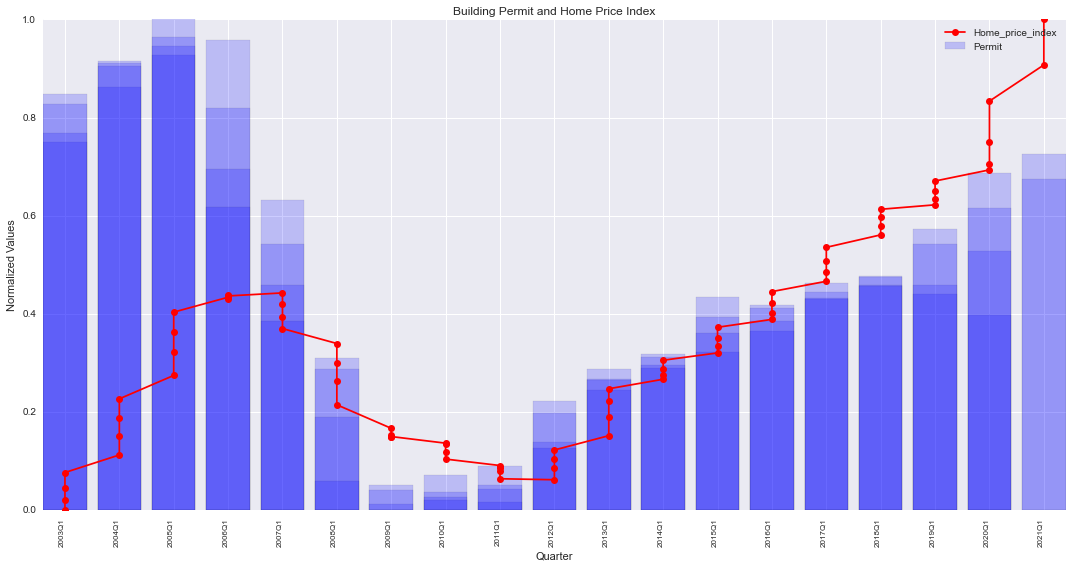

In [303]:
d_groupby = d.groupby('Quarter').agg({'Permit': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['Permit', 'Home_price_index']] = scaler.fit_transform(d[['Permit', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Permit'], width=0.8, alpha=0.2, color='Blue', label='Permit')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Building Permit and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Permit&homeprice.png')
plt.show()

The number of New Privately-Owned Housing Units Authorized (PERMIT) serves as a significant economic indicator, providing insights into the strength of the housing market and the broader economy. It quantifies the quantity of newly authorized privately-owned housing units through building permits in permit-issuing places. This metric is valuable in assessing consumer confidence and financial stability, as the issuance of residential building permits reflects the willingness and ability of individuals and developers to invest in new construction projects.

Interestingly, there exists a moderate positive correlation between the number of new privately-owned housing units authorized and home prices. This suggests that the approval and construction of additional housing units tend to contribute to an increase in home prices. The underlying mechanism is driven by the principles of supply and demand. As the supply of available homes decreases due to the construction process, the limited availability of housing, along with potential constraints on labor and materials, creates upward pressure on prices.

In summary, the number of new privately-owned housing units authorized, as measured by building permits, serves as a reliable indicator of the housing market's strength and overall economic conditions. Its moderate positive correlation with home prices suggests that an increase in authorized housing units tends to exert an upward influence on home prices, reflecting the interplay between supply, demand, and market dynamics.

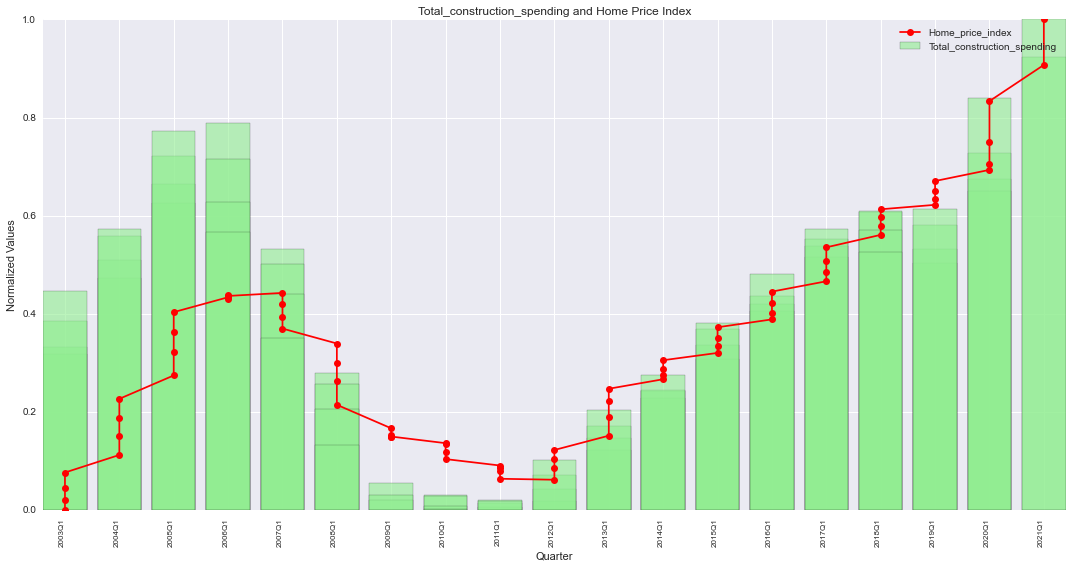

In [304]:
d_groupby = d.groupby('Quarter').agg({'Total_construction_spending': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['Total_construction_spending', 'Home_price_index']] = scaler.fit_transform(d[['Total_construction_spending', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Total_construction_spending'], width=0.8, alpha=0.6, color='LightGreen', label='Total_construction_spending')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Total_construction_spending and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Total_construction_spending&homeprice.png')
plt.show()

Total Construction Spending: Residential in the United States captures the overall expenditure on residential construction projects. As stated by Investopedia, residential construction spending accounts for a substantial portion, approximately 50%, of the total construction spending in the U.S. It is considered an essential gauge of the housing market's strength, as new home construction tends to increase when individuals exhibit optimism regarding employment prospects and economic conditions.

Notably, there exists a strong positive correlation between total construction spending on residential projects and home prices. This implies that when there is a higher level of spending on residential construction, it generally leads to an upward push in home prices. The underlying mechanism revolves around the principles of supply and demand. Increased investment in residential construction reduces the available supply of housing units, which, in turn, can create a greater demand for the limited inventory. As a result, this heightened demand tends to exert upward pressure on home prices.

To summarize, monitoring total construction spending on residential projects provides valuable insights into the housing market's health. The strong positive correlation observed between residential construction spending and home prices indicates that an increase in construction spending tends to drive home prices upward. This underscores the interdependence between construction activity, supply and demand dynamics, and the overall trajectory of housing prices.

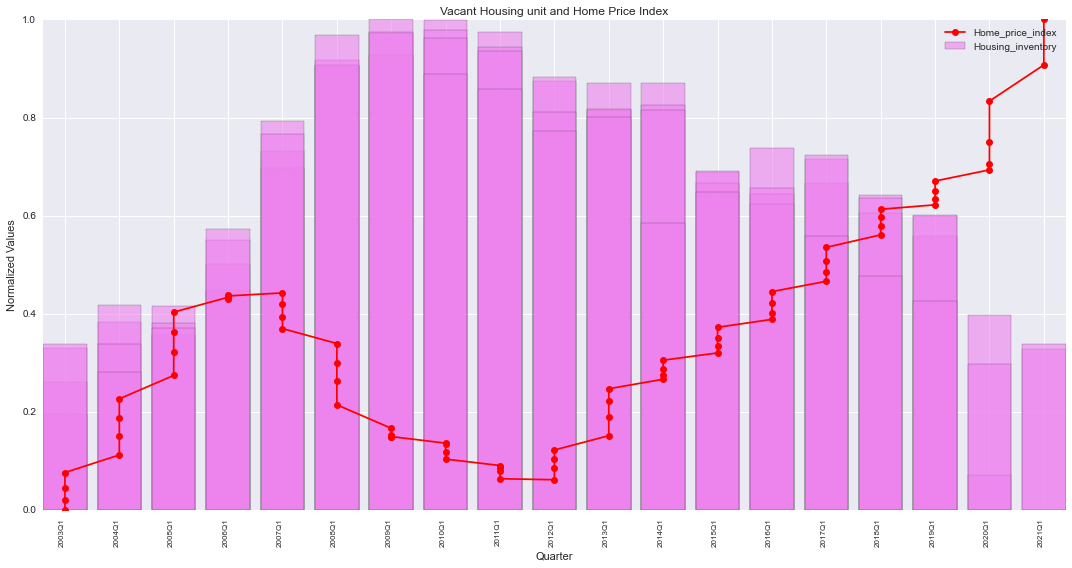

In [288]:
d_groupby = d.groupby('Quarter').agg({'Housing_inventory': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['Housing_inventory', 'Home_price_index']] = scaler.fit_transform(d[['Housing_inventory', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Housing_inventory'], width=0.8, alpha=0.6, color='Violet', label='Housing_inventory')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Vacant Housing unit and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Housinginventory&homeprice.png')
plt.show()

The estimate of vacant housing units in the United States, which is a part of the housing inventory, plays a crucial role in influencing the Home Price Index. When the supply of vacant housing units is low, it can create a competitive environment where buyers vie for limited available properties. This competition often leads to bidding wars, with potential buyers increasing their purchase price offers to outbid one another. Consequently, this high demand for a limited housing supply tends to drive home prices up.

Conversely, an increase in the number of vacant housing units can exert downward pressure on property values. When the supply of vacant units surpasses the demand from potential buyers, it can tip the balance in favor of buyers. The increased availability of housing options can reduce the sense of urgency among buyers and diminish their willingness to pay premium prices. As a result, property values may experience a decline.

In summary, the number of vacant housing units has a significant impact on the housing market. A low supply of vacant units can drive prices up due to increased competition, while a higher supply may lead to downward pressure on property values as demand weakens relative to the available supply.

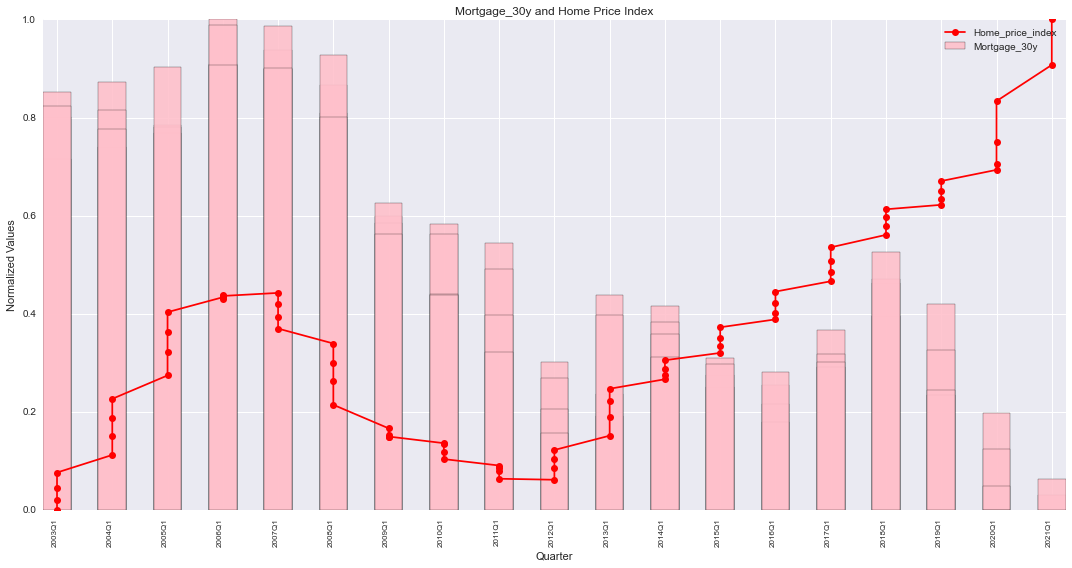

In [305]:
d_groupby = d.groupby('Quarter').agg({'Mortgage_30y': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['Mortgage_30y', 'Home_price_index']] = scaler.fit_transform(d[['Mortgage_30y', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Mortgage_30y'], width=0.5, alpha=0.9, color='Pink', label='Mortgage_30y')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Mortgage_30y and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Mortgage_30y&homeprice.png')
plt.show()

The 30-Year Fixed Rate Mortgage Average in the United States represents the average interest rate on 30-year fixed-rate mortgages. Lower mortgage rates facilitate homebuying by making it more affordable, which typically leads to increased demand and higher home prices. Conversely, higher mortgage rates can impede homebuying, resulting in decreased demand and lower home prices. However, it is important to note that in the provided graph, the relationship between the variables does not exhibit a clear negative correlation.

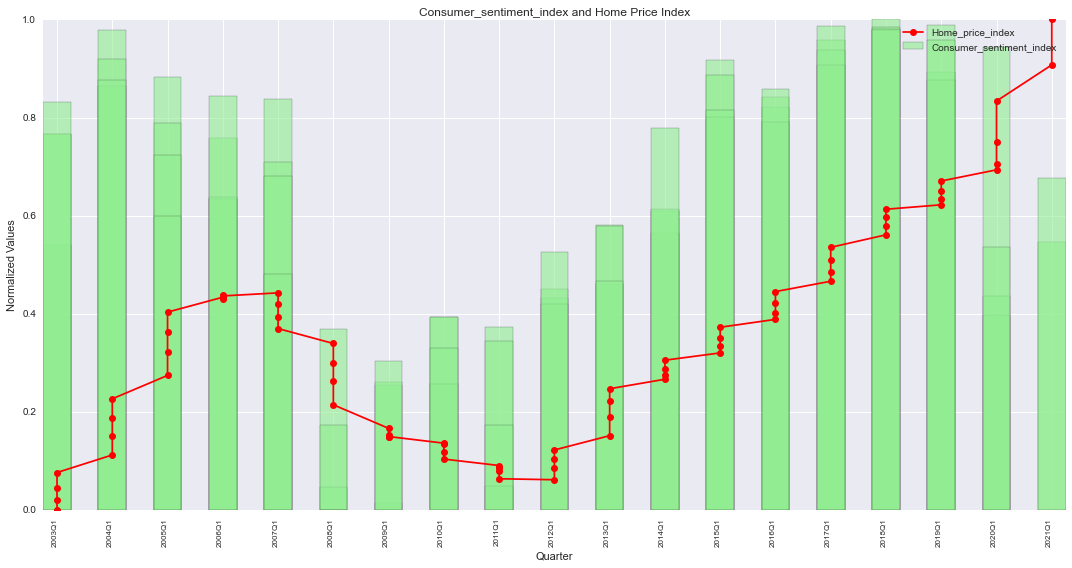

In [306]:
d_groupby = d.groupby('Quarter').agg({'Consumer_sentiment_index': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['Consumer_sentiment_index', 'Home_price_index']] = scaler.fit_transform(d[['Consumer_sentiment_index', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Consumer_sentiment_index'], width=0.5, alpha=0.6, color='LightGreen', label='Consumer_sentiment_index')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Consumer_sentiment_index and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Consumer_sentiment_index&homeprice.png')
plt.show()

The University of Michigan Consumer Sentiment Index measures the perception of current and future economic conditions among consumers. Conducted on a monthly basis, this survey provides insights into consumer confidence levels in the United States. The index holds relevance for the U.S. National Home Price Index as it captures consumer sentiment, which in turn influences consumer spending and saving behaviors. When consumers exhibit confidence in the economy, they tend to be more inclined to make significant purchases, such as homes, thereby contributing to an increase in home prices.

In [ ]:
Median_sales_price GDP

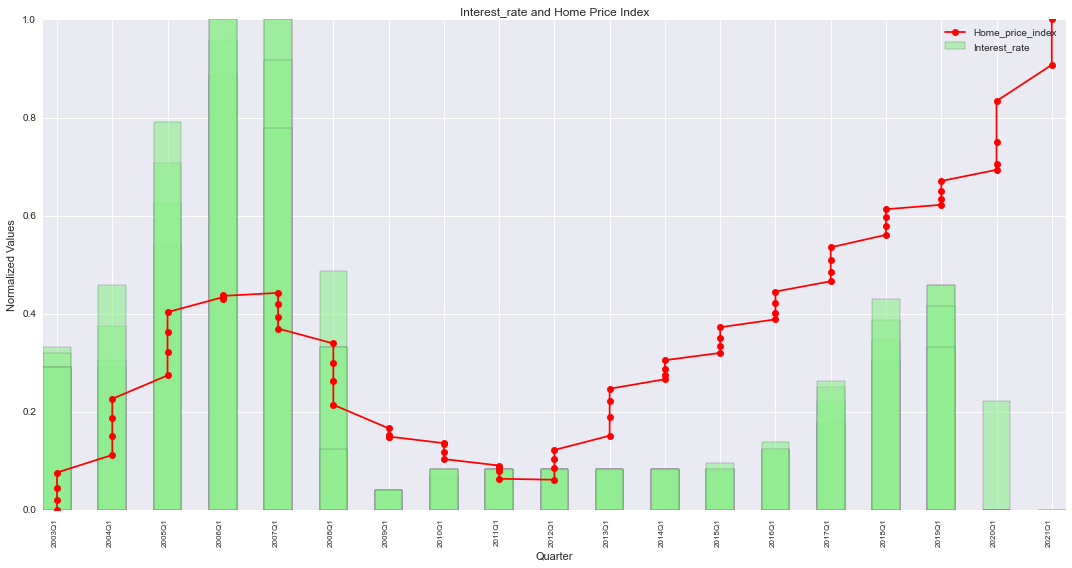

In [316]:
d_groupby = d.groupby('Quarter').agg({'Interest_rate': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['Interest_rate', 'Home_price_index']] = scaler.fit_transform(d[['Interest_rate', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Interest_rate'], width=0.5, alpha=0.6, color='LightGreen', label='Interest_rate')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Interest_rate and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Interest_rate&homeprice.png')
plt.show()



Interest Rates and Discount Rates for the United States are essential tools utilized by the Federal Reserve to regulate the availability of money and credit within the economy. Through actions such as buying or selling U.S. government securities, the Federal Reserve can control the level of reserves in the banking system. The connection between interest rates and housing costs becomes evident when considering the impact of lower interest rates.

When interest rates are lowered, it becomes more convenient for individuals to borrow money for purchasing homes. This reduction in borrowing costs tends to stimulate demand in the housing market, subsequently driving up prices. Lower interest rates make homeownership more accessible and affordable, attracting more potential buyers and increasing competition. As a result, the increased demand contributes to an upward pressure on housing prices.

In summary, the relationship between interest rates and housing costs is characterized by the fact that lower interest rates can make it easier for individuals to obtain loans to purchase homes. This, in turn, leads to an upsurge in demand, pushing housing prices higher. The manipulation of interest rates by the Federal Reserve serves as a means to influence borrowing costs and stimulate economic activity, including the housing market.

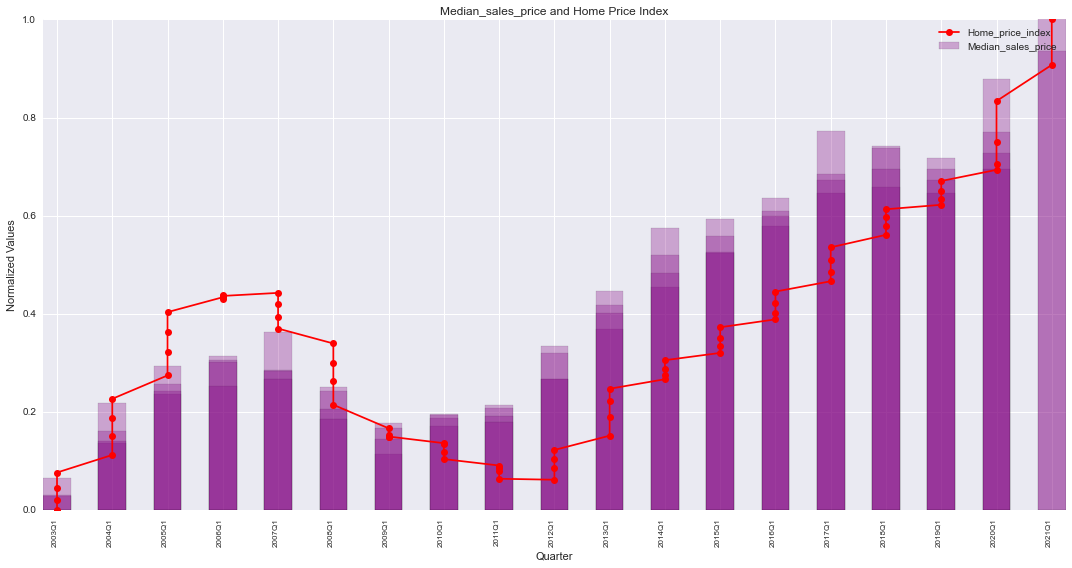

In [318]:
d_groupby = d.groupby('Quarter').agg({'Median_sales_price': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['Median_sales_price', 'Home_price_index']] = scaler.fit_transform(d[['Median_sales_price', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['Median_sales_price'], width=0.5, alpha=0.3, color='Purple', label='Median_sales_price')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Median_sales_price and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\Median_sales_price&homeprice.png')
plt.show()


The Median Sales Price of Houses Sold for the United States reflects the midpoint value at which half of the houses are sold for more and the other half for less. This measure, commonly referred to as the median sale price, provides valuable insights into the housing market. 

When the median sales price of houses sold is higher, it indicates a positive association with higher home prices. In other words, as the median sales price increases, it suggests that a significant portion of the houses sold are fetching higher prices in the market. This correlation suggests a general trend of rising home prices, where buyers are willing to pay more for residential properties.

By monitoring the changes in the median sales price over time, we can gauge the overall direction of home prices in the United States. An upward movement in the median sales price implies increasing demand or competition among buyers, leading to upward pressure on home prices.

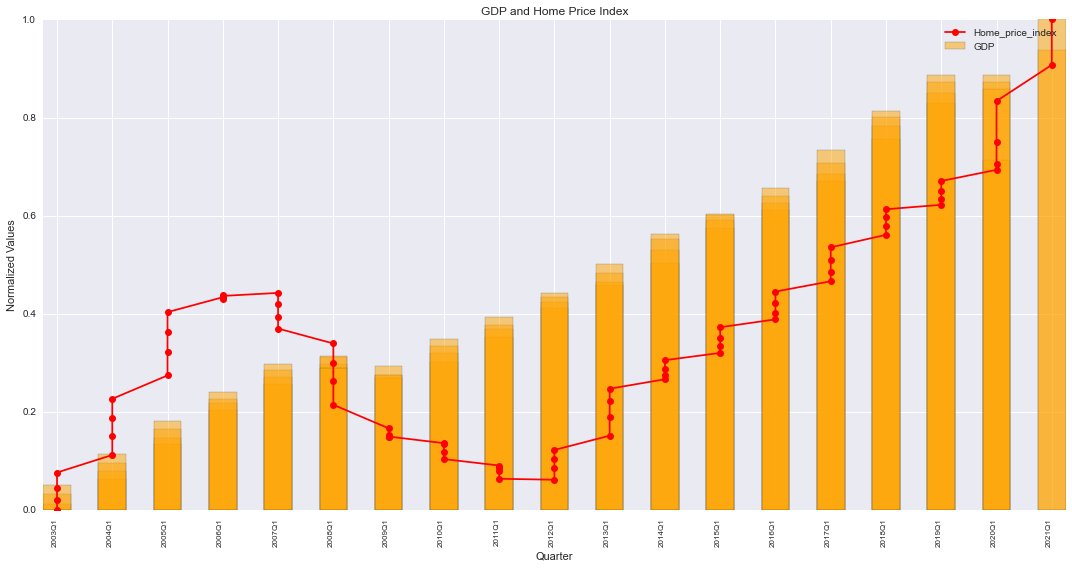

In [321]:
d_groupby = d.groupby('Quarter').agg({'GDP': 'sum', 'Home_price_index': 'mean'}).reset_index()

scaler = MinMaxScaler()
d[['GDP', 'Home_price_index']] = scaler.fit_transform(d[['GDP', 'Home_price_index']])

plt.style.use('seaborn')
plt.figure(figsize=(15, 8))  

plt.bar(d['Quarter'], d['GDP'], width=0.5, alpha=0.5, color='orange', label='GDP')


plt.plot(d['Quarter'], d['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('GDP and Home Price Index')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()
 
plt.xticks(rotation=90, ha='right', fontsize=8)  

plt.tight_layout()
plt.savefig('D:\Assignment 3 MECE\Pictures\GDP&homeprice.png')
plt.show()

The Gross Domestic Product (GDP) serves as a comprehensive measure of the economic activity within a country, including the United States. It represents the total value of goods and services produced within a specific period. The housing market and the broader economy share a symbiotic relationship, with interdependencies that influence each other.

When the GDP of a country experiences growth, it signifies an expansion in economic output and increased productivity. This growth can have positive implications for the housing market. As the GDP rises, it often indicates improved consumer confidence, increased job opportunities, and higher disposable income, which can contribute to higher home prices.

A strong GDP indicates a thriving economy, which, in turn, can stimulate various sectors, including the housing market. When individuals have a sense of economic stability and optimism, they are more inclined to invest in real estate, leading to increased demand and potentially driving up home prices.

Therefore, the correlation between GDP and home prices suggests that a robust economy, as measured by GDP growth, tends to be associated with higher home prices.

# Machine Learning Model

In [322]:
df.columns

Index(['DATE', 'Home_price_index', 'Monthly_supply_houses', 'Permit',
       'Total_construction_spending', 'Housing_inventory', 'Mortgage_30y',
       'Consumer_sentiment_index', 'Interest_rate', 'Median_sales_price',
       'GDP'],
      dtype='object')

In [324]:
X = df.drop(['DATE', 'Home_price_index'], axis = 1)
y = df['Home_price_index']

In [325]:
# Train Test Split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 101)

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [334]:

lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = mean_absolute_error(y_test, lm_prediction)
mse_lm =  mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [335]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 2.873206144893916
MSE: 15.481603929920222
RMSE: 3.93466694015138


Support Vector Machine

In [336]:
svr = SVR()
svr.fit(X_train, y_train) 
svr_prediction = svr.predict(X_test)

# Evaluation metrics
mae_svr = mean_absolute_error(y_test, svr_prediction)
mse_svr =  mean_squared_error(y_test, svr_prediction)
rmse_svr =  np.sqrt(mse_svr)

In [337]:
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

MAE: 21.136149313745612
MSE: 673.8441469872156
RMSE: 25.95850818108035


Decision Tree

In [338]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = mean_absolute_error(y_test, dt_prediction)
mse_dt =  mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [339]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 5.651739130434782
MSE: 67.37186521739127
RMSE: 8.20803662378472


Random Forest

In [341]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, rf_prediction)
mse_rf =  mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

In [342]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 4.973430434782578
MSE: 50.16761126217325
RMSE: 7.082909801922741


Best Model: Linear Regression

Best Model MSE on Testing Set: 15.481603929920222

In [343]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, lm_prediction)

print("R-squared score of linear Regression:", r2)

R-squared score of linear Regression: 0.9822961179642657


In [344]:
r2 = r2_score(y_test, svr_prediction)
print("R-squared score of SVM:", r2)

R-squared score of SVM: 0.22943014543370066


In [345]:
r2 = r2_score(y_test, dt_prediction)
print("R-squared score of Decision Tree:", r2)

R-squared score of Decision Tree: 0.9229573654167089


In [346]:
r2 = r2_score(y_test, rf_prediction)
print("R-squared score of Random Forest:", r2)

R-squared score of Random Forest: 0.942631172078779


Best Model: Linear Regression

Best Model r2_score on Testing Set: 0.9822961179642657

In [347]:
lm.fit(X_train,y_train)
lm.coef_


array([ 5.61682707, -0.54954799, 15.6572618 , -2.75495386, -2.10508627,
       -3.00562794,  3.33844565,  4.52348292, 12.21237096])

In [349]:
X.columns

Index(['Monthly_supply_houses', 'Permit', 'Total_construction_spending',
       'Housing_inventory', 'Mortgage_30y', 'Consumer_sentiment_index',
       'Interest_rate', 'Median_sales_price', 'GDP'],
      dtype='object')

In [352]:
lm.fit(X_train, y_train)

coefficients = lm.coef_
features = ['Monthly_supply_houses', 'Permit','Total_construction_spending', 'Housing_inventory', 'Mortgage_30y','Consumer_sentiment_index', 'Interest_rate', 'Median_sales_price','GDP']

print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

Coefficients:
Monthly_supply_houses: 5.616827069512337
Permit: -0.5495479866348711
Total_construction_spending: 15.65726180305671
Housing_inventory: -2.754953861033791
Mortgage_30y: -2.1050862654275093
Consumer_sentiment_index: -3.0056279355633393
Interest_rate: 3.3384456503233557
Median_sales_price: 4.523482915650885
GDP: 12.212370960031741


Monthly_supply_houses: 5.616827069512337(Positive), indicating that an increase in the monthly supply of new houses is associated with a higher predicted home price index.

Permit: -0.5495479866348711 (Small Negative), indicating that an increase in the Permit is associated with a lower predicted home price index.

Total_construction_spending: 15.65726180305671(Strong Positive), indicating that an increase in the Total construction spending is associated with a higher predicted home price index.

Housing_inventory: -2.754953861033791(Negative), indicating that an increase in the estimated number of vacant housing units is associated with a lower predicted home price index.

Mortgage_30y: -2.1050862654275093(Negative), indicating that an increase in the Mortgage is associated with a lower predicted home price index.

Consumer_sentiment_index: -3.0056279355633393(Negative), indicating that an increase in the Consumer Sentiment Index is associated with a lower predicted home price index.

Interest_rate: 3.3384456503233557(Positive), indicating that an increase in the Interest or discount rate is associated with a higher predicted home price index.

Median_sales_price: 4.523482915650885(Positive), indicating that an increase in the Median sales price is associated with a higher predicted home price index.

GDP: 12.212370960031741(positive), indicating that an increase in the GDP is associated with a higher predicted home price index.